### Etivity 2

#### Name: Brian Parle
#### ID: 18200036

**Task 1 (CS5062)**
Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

**Task 2 (CS5062)**
Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.

**Task 3 (CS5062)**
Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.

**Task 4 (CE6002)**
Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

**Task 5 (CE6002)**
Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

### Imports

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("./bank_et2.csv")

### Task1. Missing Values

In [118]:
# Find the number of nulls/NaNs in the dataset

df.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0        0
age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [119]:
#explore dataset
df.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,2000.000000,1988.000000,1990,2000,1896,2000,2000.000000,2000.000000,2000.000000,2000,2000,1809,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,1546,2000
unique,NaN,NaN,11,3,3,2,NaN,NaN,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,management,married,secondary,no,NaN,NaN,NaN,no,no,cellular,NaN,feb,NaN,NaN,NaN,NaN,failure,yes
freq,NaN,NaN,461,1111,995,1985,NaN,NaN,NaN,1037,1750,1663,NaN,404,NaN,NaN,NaN,NaN,955,1000
mean,999.500000,41.753018,NaN,NaN,NaN,NaN,1413.663500,0.241951,0.485030,NaN,NaN,NaN,13.851500,NaN,292.020500,1.909500,167.896000,2.561500,NaN,NaN
std,577.494589,12.724358,NaN,NaN,NaN,NaN,3131.224213,0.821604,1.075543,NaN,NaN,NaN,9.712189,NaN,221.557295,1.378862,131.754126,3.400735,NaN,NaN
min,0.000000,18.000000,NaN,NaN,NaN,NaN,-980.000000,-2.632068,-2.851405,NaN,NaN,NaN,1.000000,NaN,7.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,499.750000,32.000000,NaN,NaN,NaN,NaN,201.500000,-0.308018,-0.274181,NaN,NaN,NaN,5.000000,NaN,146.000000,1.000000,75.750000,1.000000,NaN,NaN
50%,999.500000,38.000000,NaN,NaN,NaN,NaN,551.000000,0.224099,0.487082,NaN,NaN,NaN,12.000000,NaN,236.000000,1.000000,182.000000,2.000000,NaN,NaN
75%,1499.250000,50.000000,NaN,NaN,NaN,NaN,1644.500000,0.806315,1.211896,NaN,NaN,NaN,23.000000,NaN,379.000000,2.000000,251.000000,3.000000,NaN,NaN


We can see from the data summary that we have missing/null values in:
- age (12)
- job (10)
- education (104)
- contact (191)
- poutcome (454)

In [120]:
#look at missing age
df.loc[df['age'].isnull()]

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


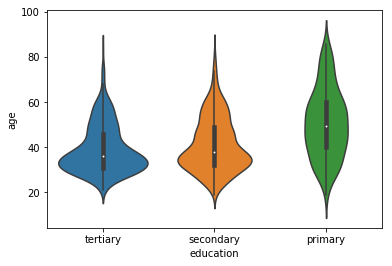

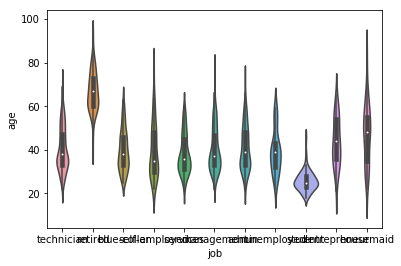

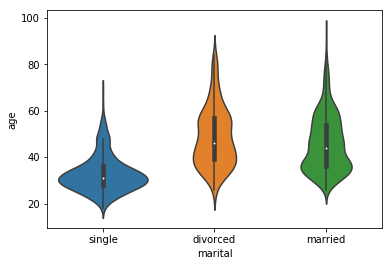

In [121]:
#it would be reasonable to set the age to the median value for the combination of [job, marital, education]
#let's first look at how they are distributed
sns.violinplot(x='education', y='age', data=df)
plt.show()
sns.violinplot(x='job', y='age', data=df)
plt.show()
sns.violinplot(x='marital', y='age', data=df)
plt.show()

In [128]:
#there isn't good separation using those values so we can fill the missing ages with the computed
#grouped by those features
#using the approach from the Lab2 notebook

#create a table with median values for our groups
df_averages = df.pivot_table(values='age', 
                       index=['job', 'education'], 
                       columns='marital', 
                       aggfunc=np.median)
print(df_averages)
# Define function to return an element of the pivot table
def get_element(x):
    return df_averages.loc[[x['job'], x['education'], x['marital']]]

marital                  divorced  married  single
job           education                           
admin.        primary        46.0     50.5    37.0
              secondary      40.0     43.0    34.0
              tertiary       37.0     33.5    33.0
blue-collar   primary        42.0     44.0    33.0
              secondary      42.0     39.0    31.5
              tertiary        NaN     27.0    29.0
entrepreneur  primary        56.0     55.0    32.0
              secondary       NaN     45.5    38.0
              tertiary       43.0     44.0    33.0
housemaid     primary        54.5     56.0    48.0
              secondary      67.0     49.0    30.0
              tertiary        NaN     47.0    29.5
management    primary         NaN     53.0     NaN
              secondary      37.0     42.0    32.0
              tertiary       44.5     39.5    32.0
retired       primary        71.0     67.0     NaN
              secondary      61.0     64.0    56.0
              tertiary       60

In [129]:
# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

df['age'].describe()

count     2000.0
unique      80.0
top         33.0
freq        95.0
Name: age, dtype: float64

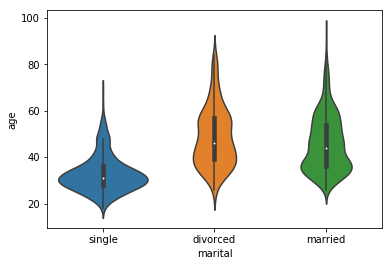

#### Impute/fill missing values in column LoanAmount

There are numerous ways to fill the missing values in column `LoanAmount` – the simplest being replacement by mean, which can be done with the following code:

```pyton
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
```

At the other extreme, we could build an ML model to predict `LoanAmount` on the basis of other columns and then use the model to predict the missing values.

Since, the purpose now is to practice data munging prior applying ML algorithms, we can take an approach, which lies somewhere in between these 2 extremes. We may hypothesise that attributes `Education` and `Self_Employed` combined can give a good estimate of `LoanAmount`.

First, let’s look at the boxplot to see if a trend exists:

Text(0.5,0.98,'')

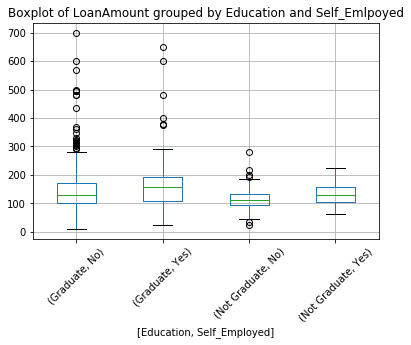

In [5]:
df.boxplot(column='LoanAmount', by=['Education','Self_Employed'], rot=45)

plt.title("Boxplot of LoanAmount grouped by Education and Self_Emlpoyed")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

We can see some variation in the median of `LoanAmount` for each group and these medians can be used for imputing the missing values in each group. But first, we have to ensure that `Self_Employed` and `Education` do not have missing values.

We know already that `Education` has no missing values, while `Self_Employed` has 32 missing values. Let’s look at the frequency table for `Self_Employed`:

In [6]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% of the values are “No”, it is safe to impute the missing values as “No” as there is a high probability of guessing correctly. This can be done using the following code:

In [7]:
df['Self_Employed'].fillna('No', inplace=True)

Next, we create a pivot table, which contains the median values for all four groups.

In [8]:
table = df.pivot_table(values='LoanAmount', 
                       index='Self_Employed', 
                       columns='Education', 
                       aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of `LoanAmount`.

In [9]:
# Define function to return an element of the pivot table
def get_element(x):
    return table.loc[x['Self_Employed'], x['Education']]

# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(get_element, axis=1), inplace=True)

In [10]:
# Verify there are no missing values in column LoanAmount

df['LoanAmount'].describe()

count    614.000000
mean     145.764658
std       84.145700
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

Similarly, the missing values for Gender, Married, Dependents, Loan_Amount_Term and Credit_History can be imputed as well.

### C. Treatment of Extreme Values/Outliers and Creation of Derived Features

In the previous lab exercise, we observed that `LoanAmount` and `ApplicantIncome` contain some extreme values. Let's take a look at their histograms again.

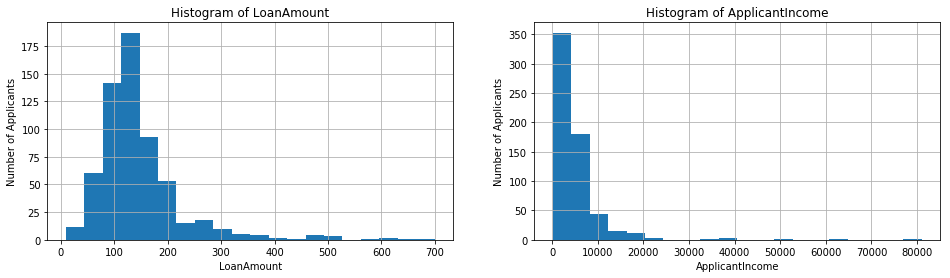

In [11]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot LoanAmount
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of LoanAmount")
ax1.set_xlabel('LoanAmount')
ax1.set_ylabel('Number of Applicants')
df['LoanAmount'].hist(bins=20)

# Plot LoanAmount_log
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of ApplicantIncome")
ax2.set_xlabel('ApplicantIncome')
ax2.set_ylabel('Number of Applicants')
df['ApplicantIncome'].hist(bins=20) 

Let’s analyse LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high-value loans, instead of ignoring the data rows with extreme LoanAmount values, we can use a log transformation to decrease any negative impact they may have later on when applying a ML algorithm to build a predictive model.

In [12]:
# Use a log transformation to decrease the impact of extreme values in column LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

Regarding `ApplicantIncome`, one intuition can be that some applicants have a low income but a co-applicant with a high income. So, it might be a good idea to combine both incomes as total income and take a log transformation of it.

In [13]:
# Create TotalIncome column and apply a log transformation
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

Let's plot again histograms for LoanAmount and ApplicantIncome as well as histograms for the two new attributes we created.

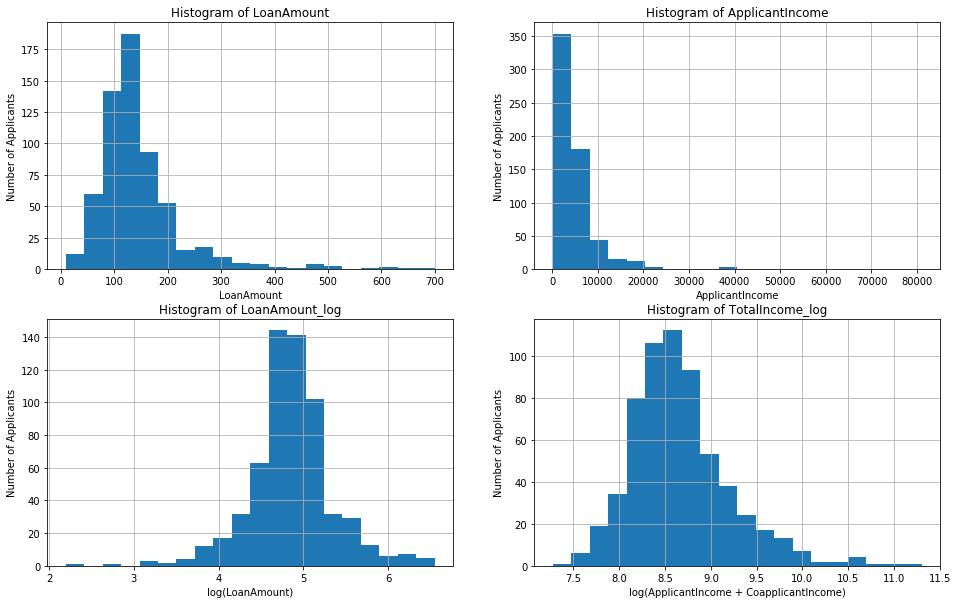

In [17]:
# Create figure with four subplots
fig = plt.figure(figsize=(16,10))

# Plot LoanAmount
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Histogram of LoanAmount")
ax1.set_xlabel('LoanAmount')
ax1.set_ylabel('Number of Applicants')
df['LoanAmount'].hist(bins=20)

# Plot LoanAmount_log
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Histogram of ApplicantIncome")
ax2.set_xlabel('ApplicantIncome')
ax2.set_ylabel('Number of Applicants')
df['ApplicantIncome'].hist(bins=20)

# Plot LoanAmount_log
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Histogram of LoanAmount_log")
ax3.set_xlabel('log(LoanAmount)')
ax3.set_ylabel('Number of Applicants')
df['LoanAmount_log'].hist(bins=20)

# Plot LoanAmount_log
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Histogram of TotalIncome_log")
ax4.set_xlabel('log(ApplicantIncome + CoapplicantIncome)')
ax4.set_ylabel('Number of Applicants')
df['TotalIncome_log'].hist(bins=20) 

The histograms show that both new features have distribution closer to normal than the original features `LoanAmount` and `ApplicantIncome`.

Similar to `TotalIncome_log`, it is possible to derive other additional information from the data. For example, a feature for `LoanAmount/TotalIncome` can be created, which might make sense as it gives an idea of how well the applicant is suited to pay back the loan.